
### Pyber Data Analysis
* Urban cities have the least average fare and highest number of rides and drivers. So, as the drivers and rides increase, the average fare deacreases.
* Rural cities have the highest average fare owing to less number of drivers and rides taken.
* Urban cities outrun suburban and rural cities in the number of drivers, total rides and fare collections by a huge margin. 
------

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

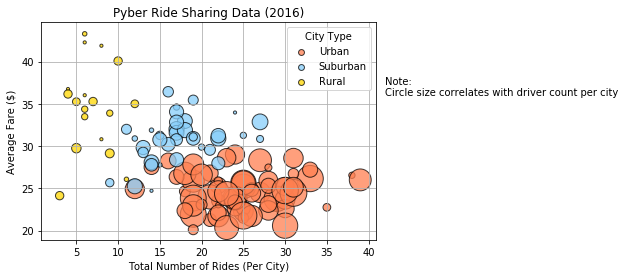

In [3]:
# Obtain the x and y coordinates for each of the three city types
grouped_data=combined_data_df.groupby(["type"])

#urban
urban_group=grouped_data.get_group("Urban")
urban_group_cities=urban_group.groupby(["city"])
urban_group_cities_rides=urban_group_cities.count()["ride_id"]
urban_group_cities_fare=urban_group_cities.mean()["fare"]
urban_group_cities_drivers=urban_group_cities["driver_count"].mean()

#suburban
suburban_group=grouped_data.get_group("Suburban")
suburban_group_cities=suburban_group.groupby(["city"])
suburban_group_cities_rides=suburban_group_cities.count()["ride_id"]
suburban_group_cities_fare=suburban_group_cities.mean()["fare"]
suburban_group_cities_drivers=suburban_group_cities["driver_count"].mean()

#rural
rural_group=grouped_data.get_group("Rural")
rural_group_cities=rural_group.groupby(["city"])
rural_group_cities_rides=rural_group_cities.count()["ride_id"]
rural_group_cities_fare=rural_group_cities.mean()["fare"]
rural_group_cities_drivers=rural_group_cities["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_group_cities_rides,urban_group_cities_fare, marker="o", facecolors="coral", edgecolors="black",s=urban_group_cities_drivers*10, alpha=0.75, label="Urban")
plt.scatter(suburban_group_cities_rides,suburban_group_cities_fare, marker="o", facecolors="lightskyblue", edgecolors="black",s=suburban_group_cities_drivers*10, alpha=0.75, label="Suburban")
plt.scatter(rural_group_cities_rides,rural_group_cities_fare, marker="o", facecolors="gold", edgecolors="black",s=rural_group_cities_drivers*10, alpha=0.75,label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd=plt.legend(title="City Type",loc='upper right')
lgnd.legendHandles[0].set_sizes([35])
lgnd.legendHandles[1].set_sizes([35])
lgnd.legendHandles[2].set_sizes([35])

# Incorporate a text label regarding circle size
plt.text(42, 36, 'Note:\nCircle size correlates with driver count per city')

# Save Figure
plt.savefig("output/Bubble_Plot.png")

# Show Figure
plt.show()



## Total Fares by City Type

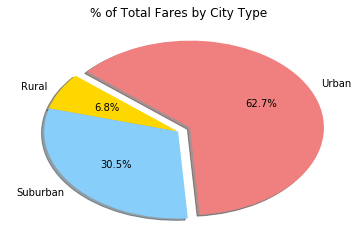

In [4]:
# Calculate Type Percents
fare_data=combined_data_df[["type","fare"]]
total_fare=fare_data["fare"].sum()
grouped_by_type=fare_data.groupby(["type"])
grouped_by_type_sum=grouped_by_type.sum()["fare"]
grouped_by_fare_percent=(grouped_by_type_sum/total_fare * 100)

# Build Pie Chart
explode=(0,0,0.1)
colors=("gold","lightskyblue","lightcoral")
type_chart = plt.pie(grouped_by_fare_percent,explode=explode, colors=colors,labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("output/Total_Fares_by_City_Type.png")

# Show Figure
plt.show()



## Total Rides by City Type

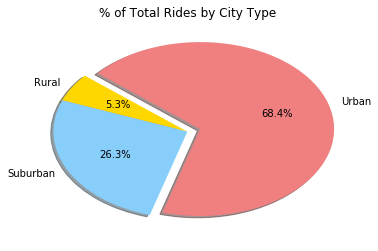

In [5]:
# Calculate Ride Percents
ride_data=combined_data_df[["type","ride_id"]]
total_rides=ride_data["ride_id"].count()
grouped_by_type=ride_data.groupby(["type"])
grouped_by_type_rides=grouped_by_type.count()["ride_id"]
grouped_by_ride_percent=(grouped_by_type_rides/total_rides * 100)

# Build Pie Chart
ride_chart = plt.pie(grouped_by_ride_percent,explode=explode, colors=colors,labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("output/Total_Rides_by_City_Type.png")

# Show Figure
plt.show()



## Total Drivers by City Type

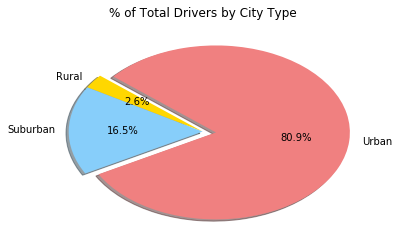

In [6]:
# Calculate Driver Percents
driver_data=combined_data_df[["type","driver_count","city"]]
unique_total_drivers=driver_data["driver_count"].unique().sum()
grouped_by_type_city=driver_data.groupby(['type','city'])
grouped_by_type_drivers=grouped_by_type_city["driver_count"].mean()
grouped_by_drivers=(grouped_by_type_drivers/unique_total_drivers * 100)
grouped_by_drivers_df=pd.DataFrame(grouped_by_drivers)
grouped_by_drivers_final=grouped_by_drivers_df.groupby(["type"])["driver_count"].sum()

# Build Pie Chart
driver_chart = plt.pie(grouped_by_drivers_final,explode=explode, colors=colors,labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("output/Total_Drivers_by_City_Type.png")

# Show Figure
plt.show()

